<img src="./images/coronavirus_icon-1.jpg" style="float: left; margin: 20px; height: 75px">

# **Capstone: Covid-19 Study**

# 2.  EDA

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Read in Datasets

merged_1 = pd.read_csv('../us_datasets/merged_1.csv')
merged_2 = pd.read_csv('../us_datasets/merged_2.csv')
merged_3 = pd.read_csv('../us_datasets/merged_3.csv')
merged_1_ratio = pd.read_csv('../us_datasets/merged_1_ratio.csv')
time_series_df = pd.read_csv('../us_datasets/time_series_df.csv')

## Create Correlation Heatmaps

### 01-01-2021 dataset Heatmap

In [33]:
# View merge_1 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3013 non-null   int64  
 1   school_closing                     3013 non-null   float64
 2   workplace_closing                  3013 non-null   float64
 3   cancel_public_events               3013 non-null   float64
 4   restrictions_on_gatherings         3013 non-null   float64
 5   public_transport_closing           3013 non-null   float64
 6   stay_at_home_requirements          3013 non-null   float64
 7   restrictions_on_internal_movement  3013 non-null   float64
 8   international_travel_controls      3013 non-null   float64
 9   income_support                     3013 non-null   float64
 10  debt_relief                        3013 non-null   float64
 11  public_information_campaigns       3013 non-null   float

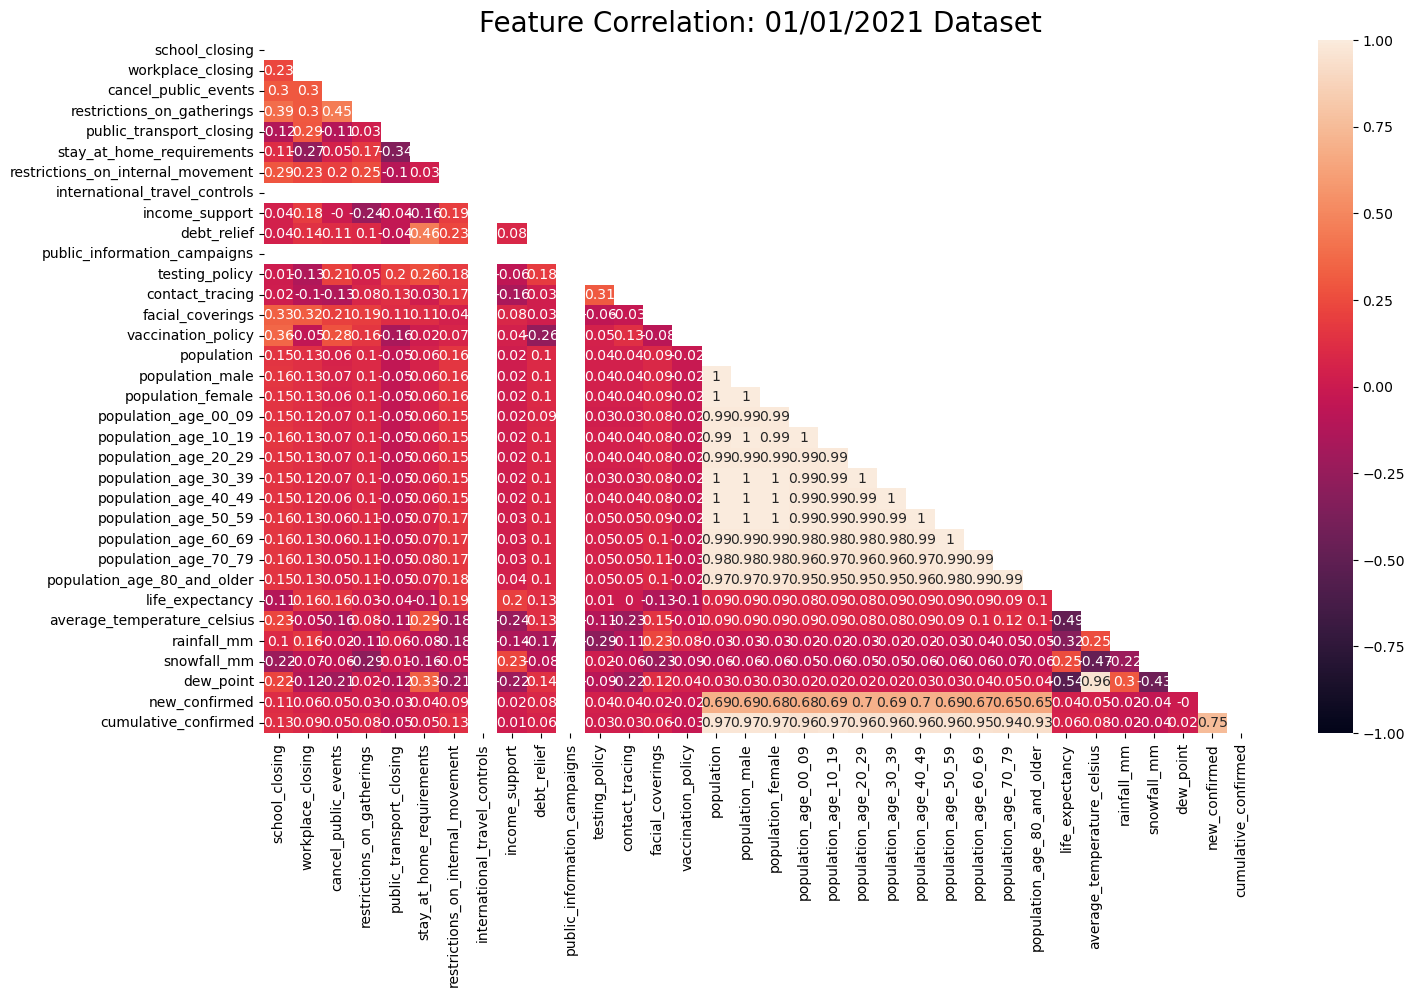

In [48]:
#  Create heatmap to optimize feature selection

merged_1_corr = merged_1.drop(columns = ['Unnamed: 0','new_deceased', 'cumulative_deceased'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           mask = mask,
           annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset', size = 20);

In [35]:
# research feature

merged_1_corr.international_travel_controls.value_counts()

international_travel_controls
3.0    3013
Name: count, dtype: int64

In [36]:
# research feature

merged_1_corr.public_information_campaigns.value_counts()

public_information_campaigns
2.0    3013
Name: count, dtype: int64

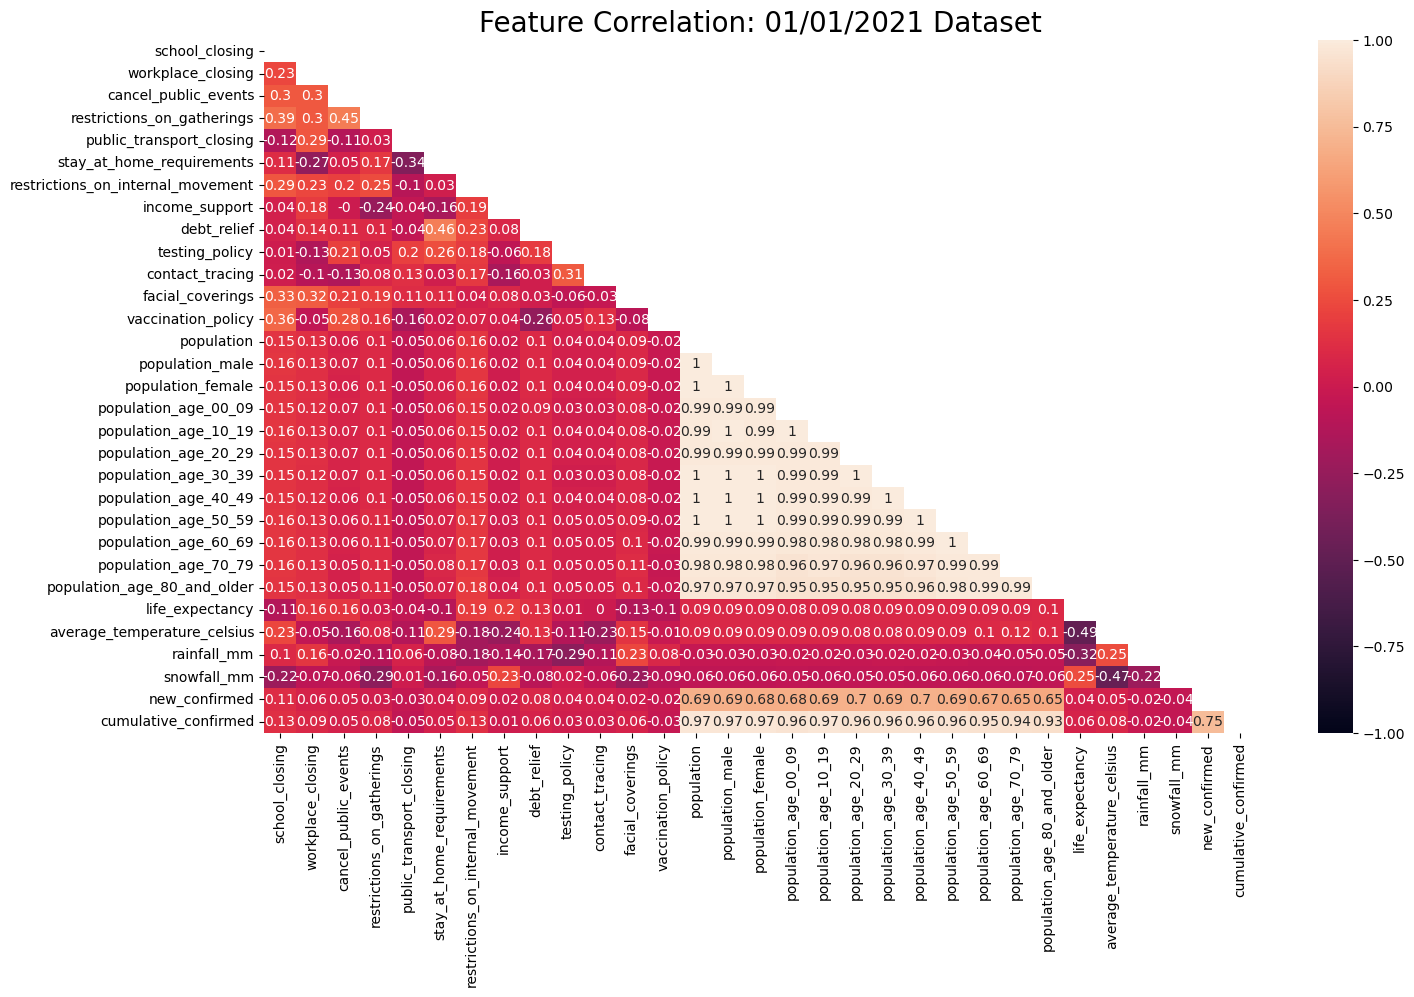

In [49]:
# Drop unnecessary features

merged_1_corr = merged_1.drop(columns = ['Unnamed: 0', 'new_deceased', 'dew_point', 
                                         'cumulative_deceased', 'international_travel_controls', 
                                         'public_information_campaigns'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset', size = 20);

In [50]:
# Save dataframe for modeling

merged_1_corr.to_csv('../us_datasets/merged_1_corr.csv')

### 01-01-2021 Ratio dataset Heatmap

In [59]:
# Check merged_1_ratio columns

merged_1_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3013 non-null   int64  
 1   school_closing                     3013 non-null   float64
 2   workplace_closing                  3013 non-null   float64
 3   cancel_public_events               3013 non-null   float64
 4   restrictions_on_gatherings         3013 non-null   float64
 5   public_transport_closing           3013 non-null   float64
 6   stay_at_home_requirements          3013 non-null   float64
 7   restrictions_on_internal_movement  3013 non-null   float64
 8   international_travel_controls      3013 non-null   float64
 9   income_support                     3013 non-null   float64
 10  debt_relief                        3013 non-null   float64
 11  public_information_campaigns       3013 non-null   float

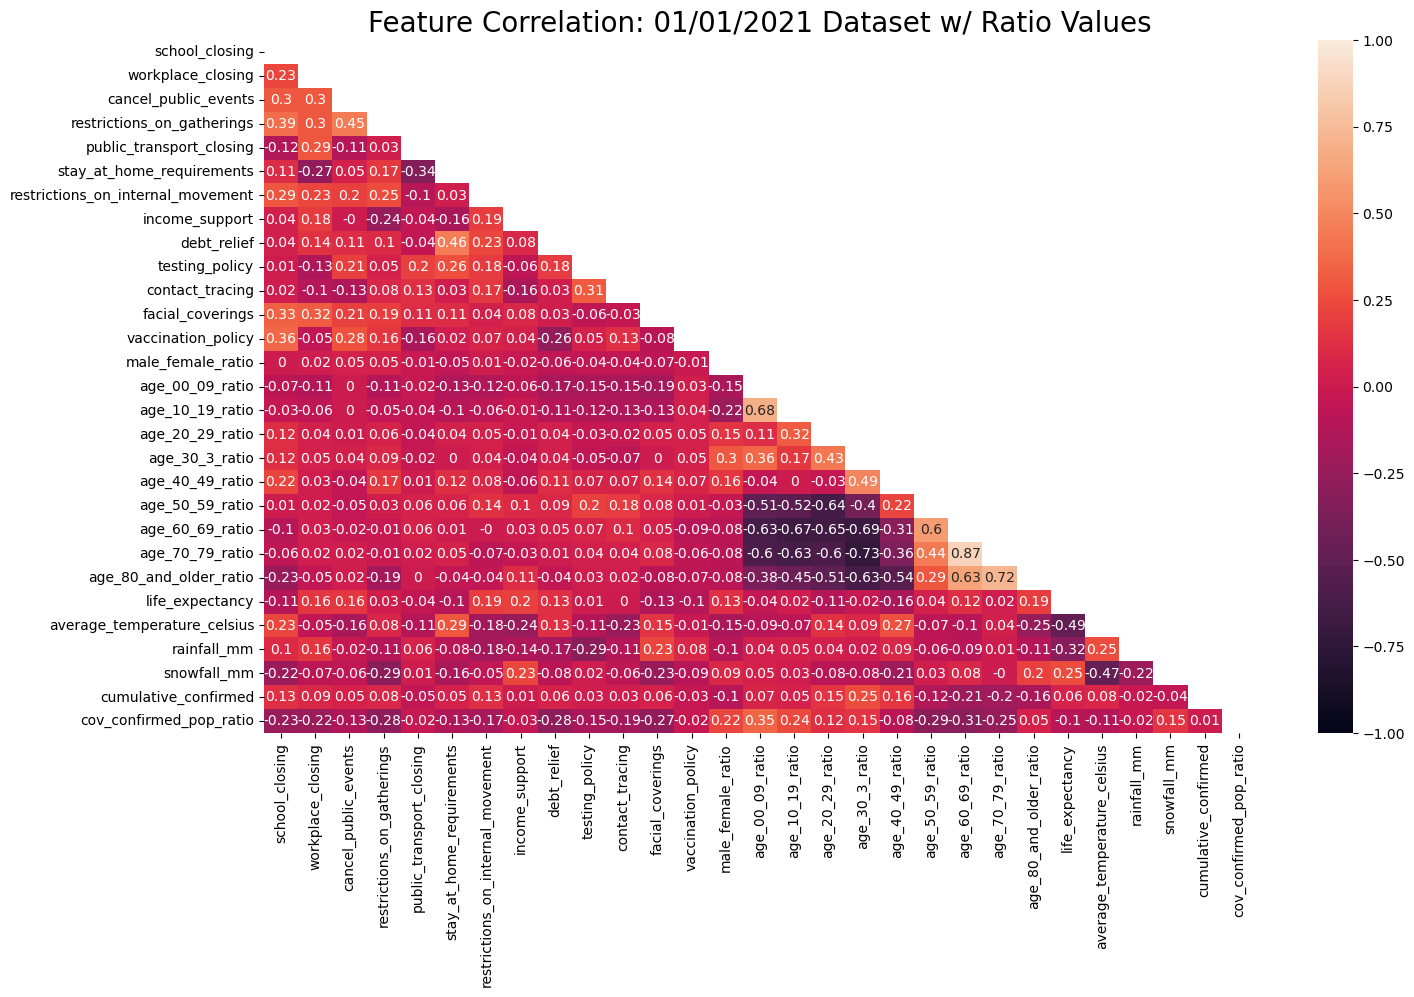

In [31]:
#  Create heatmap to optimize feature selection

merged_1_corr_ratio = merged_1_ratio.drop(columns = ['Unnamed: 0', 'new_confirmed', 'new_deceased', 'dew_point', 
                                                     'cumulative_deceased', 'international_travel_controls', 
                                                     'public_information_campaigns','deceased_pop_ratio'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr_ratio.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           mask = mask,
           annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset w/ Ratio Values', size = 20);

In [ ]:
# Save dataframe for modeling

merged_1_corr_ratio.to_csv('../us_datasets/merged_1_corr_ratio.csv')

### 09-01-2021 dataset Heatmap

In [40]:
# View merge_2 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3012 non-null   int64  
 1   school_closing                       3012 non-null   float64
 2   workplace_closing                    3012 non-null   float64
 3   cancel_public_events                 3012 non-null   float64
 4   restrictions_on_gatherings           3012 non-null   float64
 5   public_transport_closing             3012 non-null   float64
 6   stay_at_home_requirements            3012 non-null   float64
 7   restrictions_on_internal_movement    3012 non-null   float64
 8   international_travel_controls        3012 non-null   float64
 9   income_support                       3012 non-null   float64
 10  debt_relief                          3012 non-null   float64
 11  public_information_campaigns  

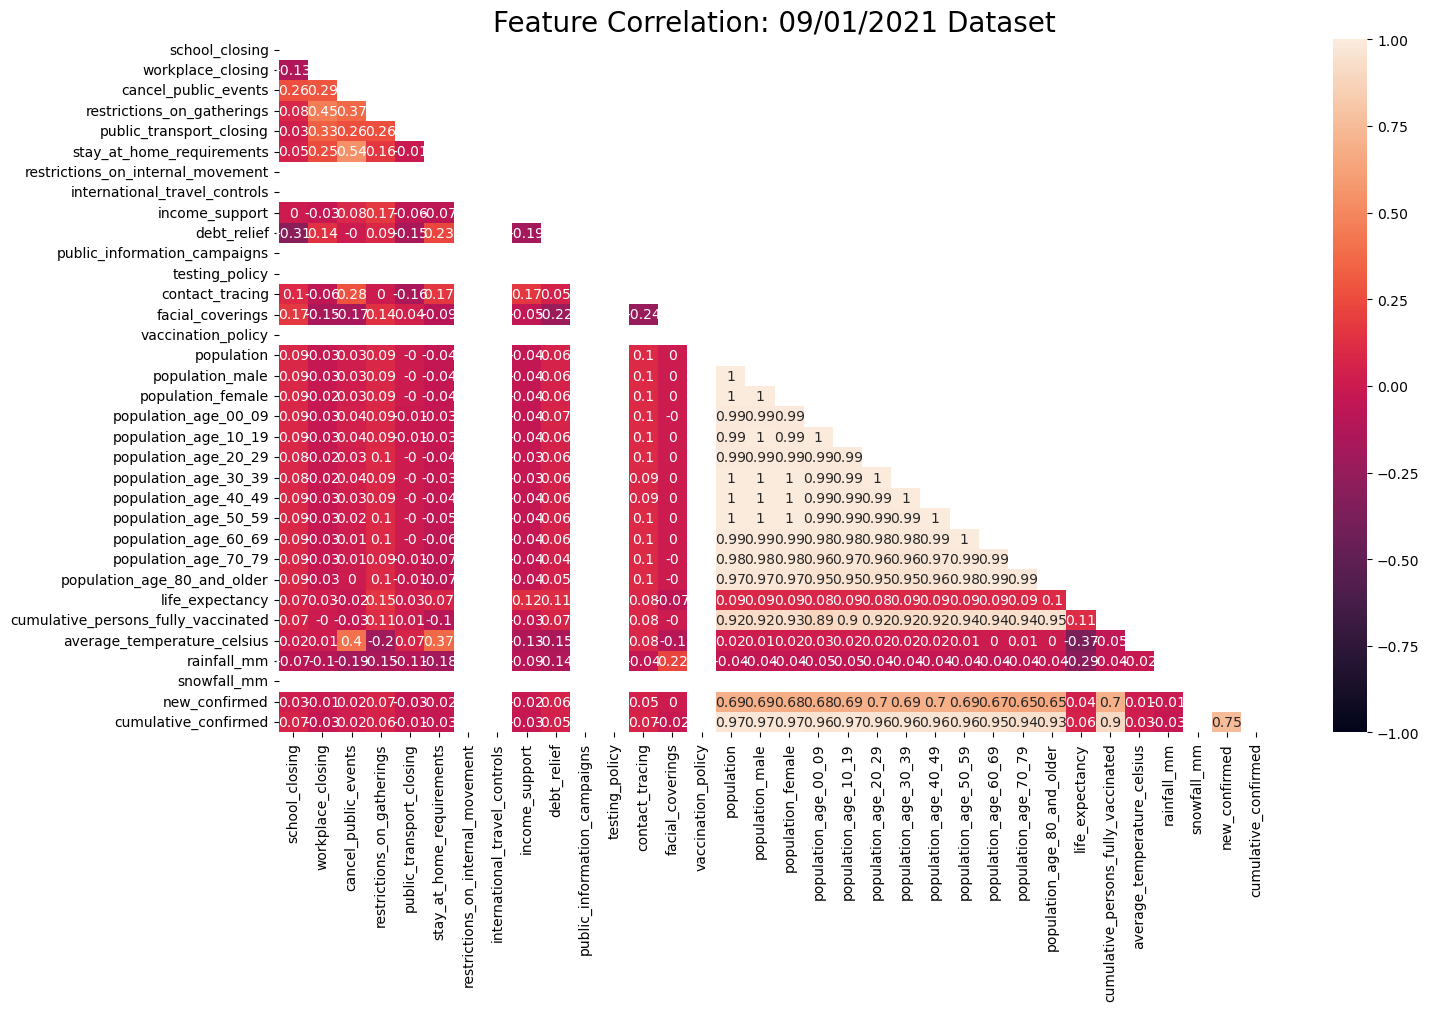

In [51]:
# Drop unnecessary features

merged_2_corr = merged_2.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point'])
plt.figure(figsize = (16, 9))
corr = round(merged_2_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 09/01/2021 Dataset', size = 20);

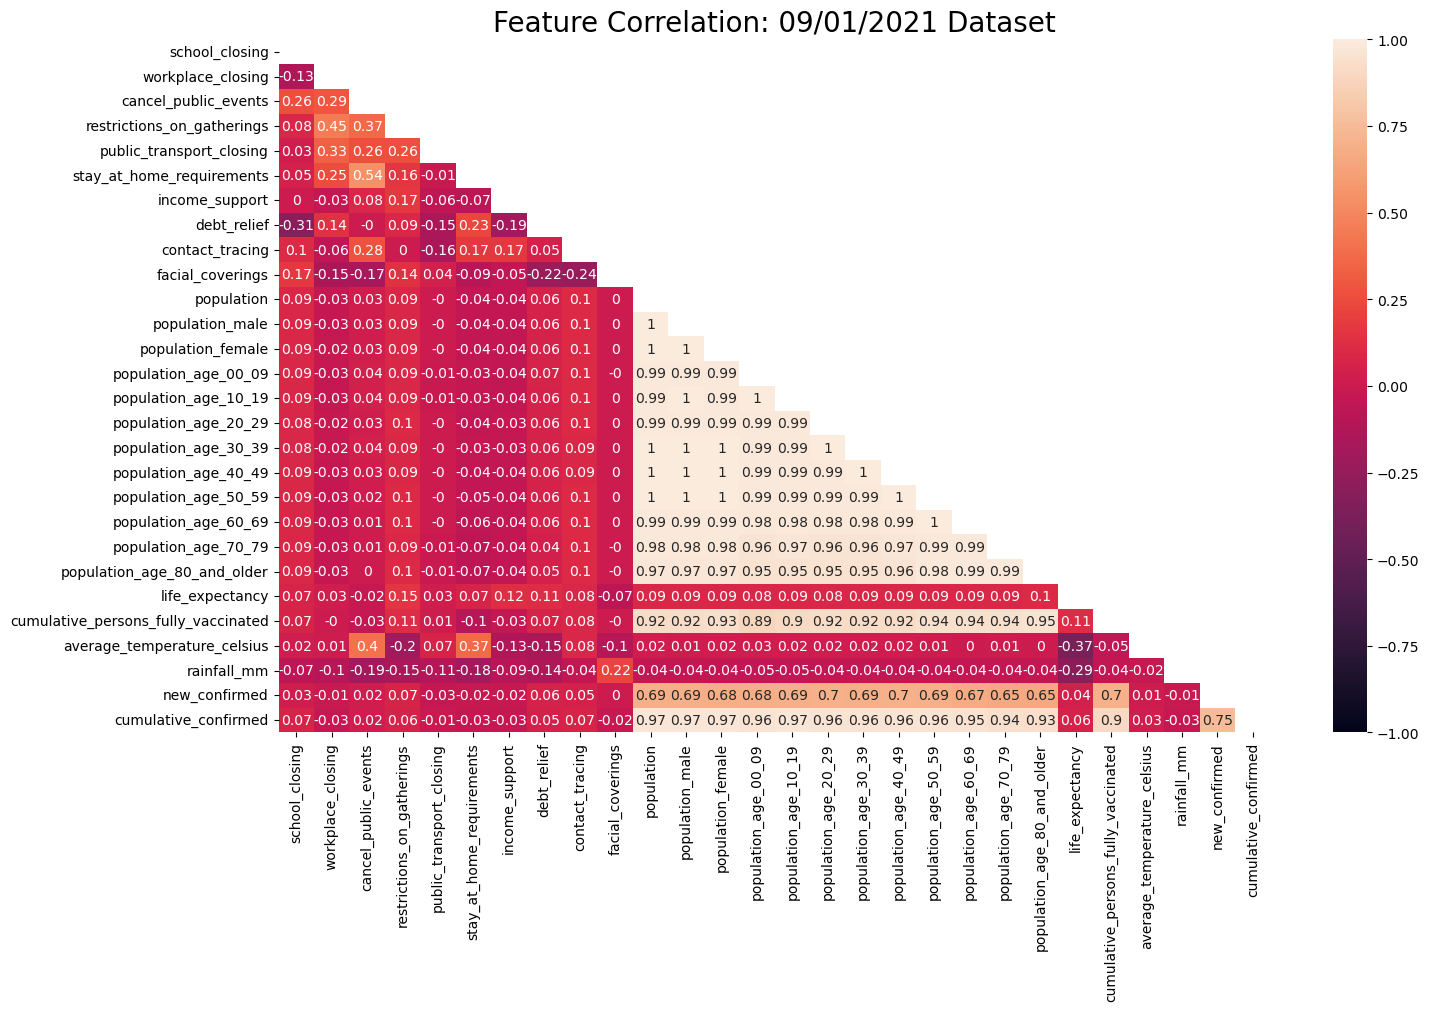

In [52]:
# Drop unnecessary features per above heatmap

merged_2_corr = merged_2.drop(columns = ['Unnamed: 0','new_deceased', 'cumulative_deceased',
                                         'dew_point', 'restrictions_on_internal_movement',
                                         'international_travel_controls', 'public_information_campaigns',
                                         'testing_policy', 'vaccination_policy', 'snowfall_mm'])
plt.figure(figsize = (16, 9))
corr = round(merged_2_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 09/01/2021 Dataset', size = 20);

In [53]:
# Save dataframe for modeling

merged_2_corr.to_csv('../us_datasets/merged_2_corr.csv')

### 05-13-2022 dataset Heatmap

In [54]:
# View merge_3 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3013 non-null   int64  
 1   school_closing                       3013 non-null   float64
 2   workplace_closing                    3013 non-null   float64
 3   cancel_public_events                 3013 non-null   float64
 4   restrictions_on_gatherings           3013 non-null   float64
 5   public_transport_closing             3013 non-null   float64
 6   stay_at_home_requirements            3013 non-null   float64
 7   restrictions_on_internal_movement    3013 non-null   float64
 8   international_travel_controls        3013 non-null   float64
 9   income_support                       3013 non-null   float64
 10  debt_relief                          3013 non-null   float64
 11  public_information_campaigns  

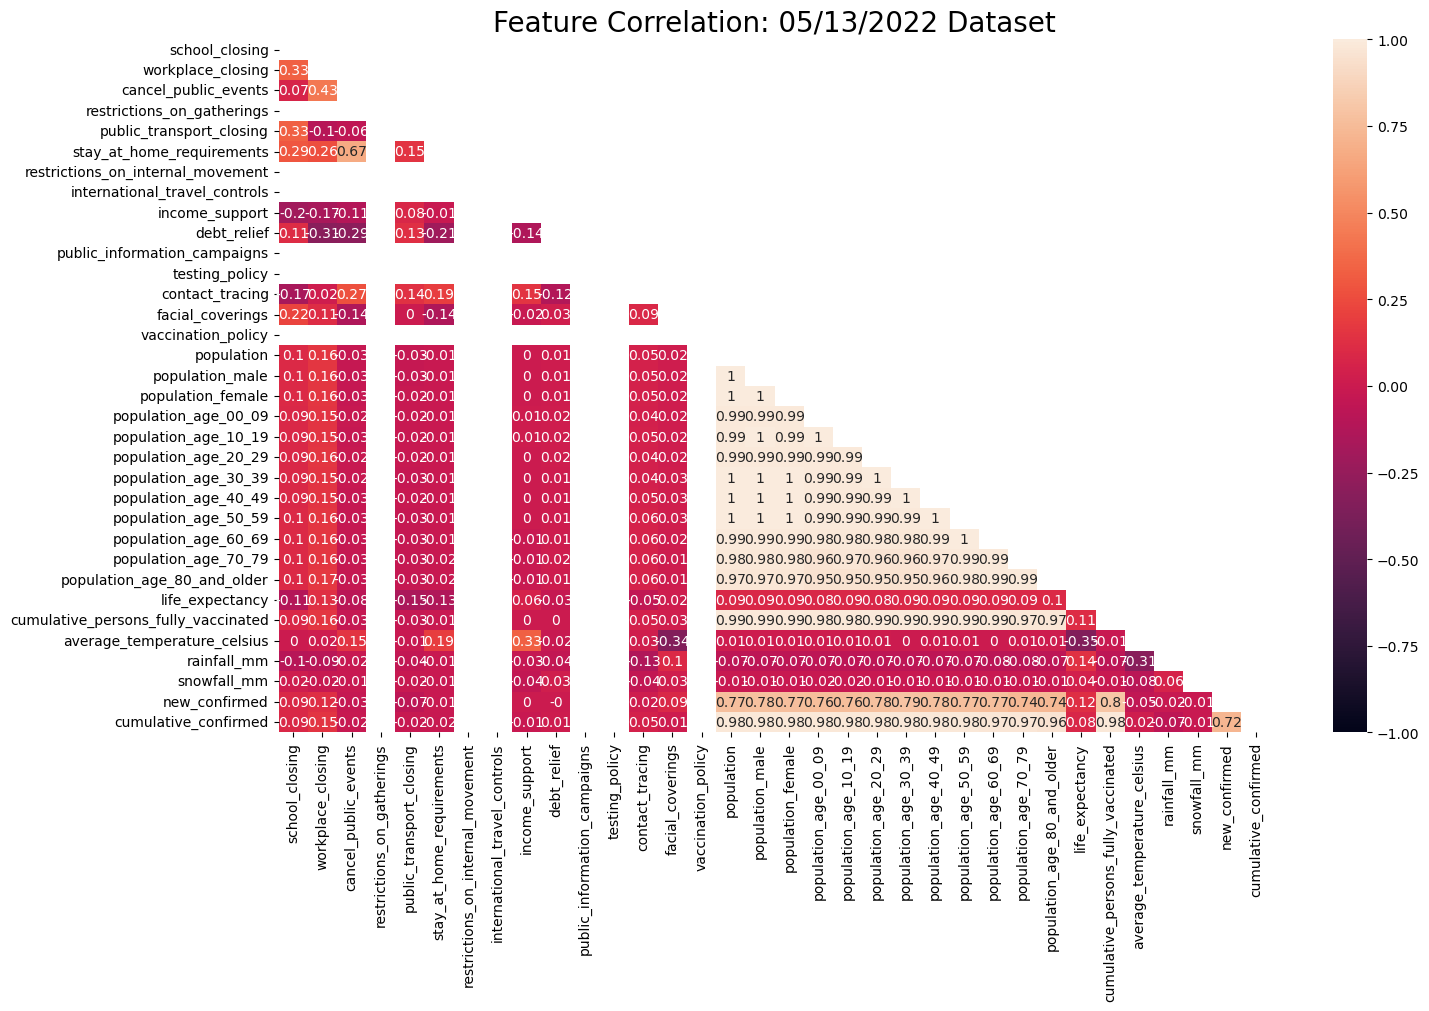

In [55]:
# Drop unnecessary features

merged_3_corr = merged_3.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point'])
plt.figure(figsize = (16, 9))
corr = round(merged_3_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 05/13/2022 Dataset', size = 20);

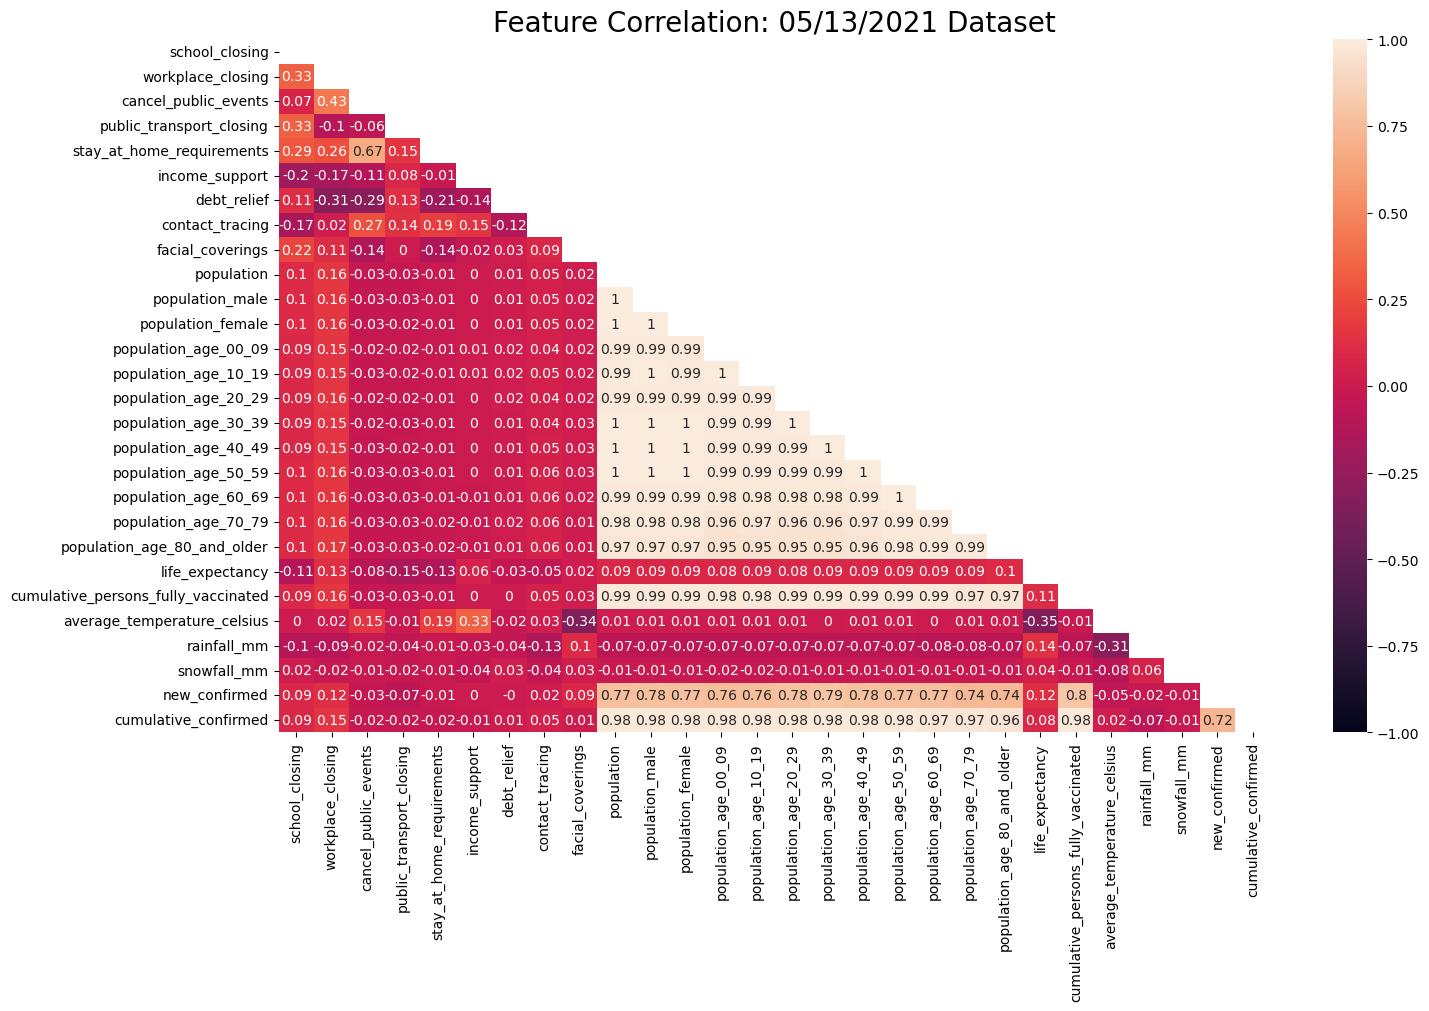

In [57]:
# Drop unnecessary features per above heatmap

merged_3_corr = merged_3.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point',
                                         'restrictions_on_internal_movement','international_travel_controls', 
                                         'public_information_campaigns', 'testing_policy', 'vaccination_policy', 
                                         'restrictions_on_gatherings'])
plt.figure(figsize = (16, 9))
corr = round(merged_3_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 05/13/2021 Dataset', size = 20);

In [58]:
# Save dataframe for modeling

merged_3_corr.to_csv('../us_datasets/merged_3_corr.csv')